## Write Up

I have created a dashboard for wine enthusiasts! 
Wine is one of most popular beverages in the world and in some countries, it is considered "water". 
Initially, this dataset was very attractive to me because of how diverse the it is: it has both categorical and numerical data. The dataset contains name of the wines, the origin, price, ratings out of 100, reviewer, region and country. Since it has location of the origin and we have covered geopandas and mapping in class, I wanted to incorporate that into the interactions. 

The world map has an interaction (source: https://stackoverflow.com/questions/53142563/coloring-specific-countries-with-geopandas) which highlights the country that you select in the ipywidgets. I altered it to make it work for my specific dataset. When I was running the cells, I ran into so many erros and jupyter notebook just crashed. One of the reasons was the particular coutry selection. I fixed the error by giving all the possible known names for specific country names. 

There are a total of five interaction features in the dashboard. First, you can select a country, If you want to see the list of wines from Italy, you would select "Italy" from the first drop-down menu. It will automatically shows all the wines from Italy. In the searh section, you can type something that you are looking for. If you are looking for wines with fruity flavors, you can search fruity. The result is generated off the reviews of the wines. It is like the search engines. You still get a lot of choices because this is a huge dataset. You can narrow down your selection by searching the "variety" which is the type of wine. Pinot Grigio is an example for the variety. 

The intslider for points and price is to give a range for the users. If you want to see the list with wines that have points higher than 90 and the price range between `$100` and `$2300`, you can just simply move the intsliders to make your ranges. 

There are not many wine datasets that would compliment this one. One I found is called "Red Wine Dataset" (Source: https://www.kaggle.com/piyushgoyal443/red-wine-dataset). I could incorporate two datasets to make a dashboard geared towards the red wine so I can provide more detailed information to the users who wants to see the red wine list. 

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install geopandas
!pip install descartes

## Imports

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import ipywidgets
import geopandas as gpd
from descartes import PolygonPatch
from IPython.display import display
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Dataset
Use this link to download the csv file: https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv

In [16]:
wine = pd.read_csv("./wine.csv")
# https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv

FileNotFoundError: [Errno 2] No such file or directory: './wine.csv'

Let's a quick peak at our data:

In [3]:
wine.head(10)

,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


A main feature of this dataset is that it gives a rating for each wine. Here is a brief histogram to show the scale of the rating. This might matter later on because a rating of 80 sounds great on a scale from 0 - 100; however, 80 is actually in fact one of the lowest scores given in the entire dataset.

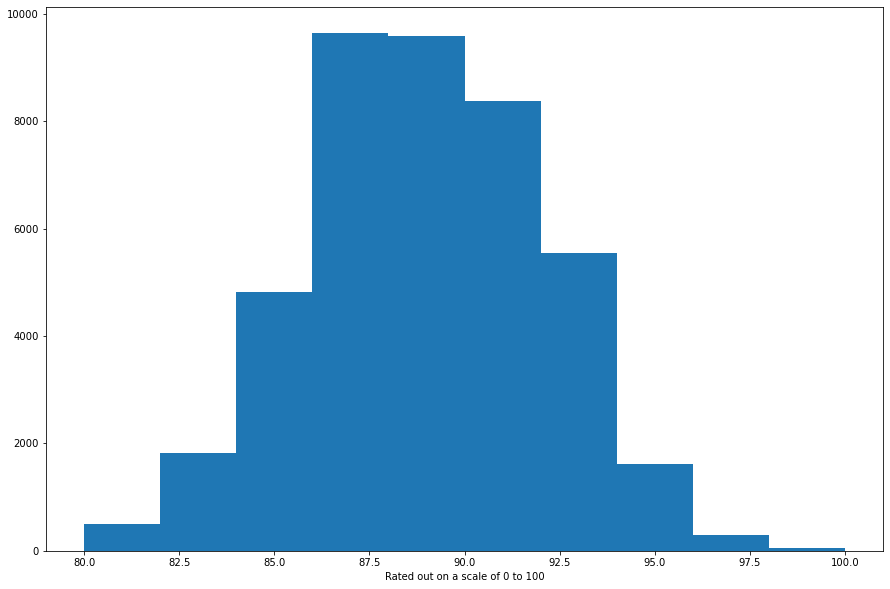

In [4]:
fig,ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Rated out on a scale of 0 to 100")
plt.hist(wine['points']);

Let's also explore the relationship between the wine's price and points. I would expect that as the wine is rated higher, the wine also becomes more expensive

In [5]:
df = wine.groupby("points")["price"].describe()

In [6]:
df

,count,mean,std,min,25%,50%,75%,max
points,,,,,,,,
80,184.0,17.054348,9.258715,5.0,11.0,14.0,20.0,69.0
81,300.0,16.716667,11.425623,5.0,10.0,13.0,19.0,95.0
82,731.0,19.196990,10.895999,4.0,12.0,15.0,25.0,79.0
83,998.0,18.121242,10.513989,5.0,11.0,15.0,22.0,100.0
84,1927.0,19.279190,12.812608,4.0,12.0,15.0,23.0,200.0
85,2595.0,19.455106,13.434233,5.0,12.0,16.0,23.0,320.0
86,3839.0,22.007815,13.728133,4.0,13.0,18.0,25.0,160.0
87,5143.0,24.554735,18.357752,5.0,15.0,20.0,30.0,800.0
88,5265.0,28.529915,17.278931,6.0,17.0,24.0,35.0,185.0


Based on the simple table above, it is obvious that the relationship is true; expensive wine tends to be rated higher and vice versa. I will also plot it:

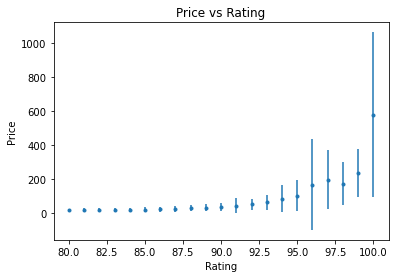

In [7]:
plt.errorbar(df.index, df["mean"], df["std"], linestyle='None', marker='.')
plt.ylabel("Price")
plt.xlabel("Rating")
plt.title("Price vs Rating")
plt.show()

Now I am going to explore more about the wines of different countries. Let's start by collecting basic information about each country and their average points and prices:

In [8]:
countries = wine["country"].unique()
df = wine.groupby("country")[["points", "price"]].mean().dropna()

In [9]:
df

,points,price
country,,
Argentina,86.598431,25.496032
Australia,88.478378,34.381344
Austria,90.247826,31.229232
Bosnia and Herzegovina,88.000000,12.000000
Brazil,84.142857,23.923077
Bulgaria,87.770833,15.666667
Canada,89.371681,36.637168
Chile,86.341528,20.240591
China,89.000000,18.000000


Here is a plot:

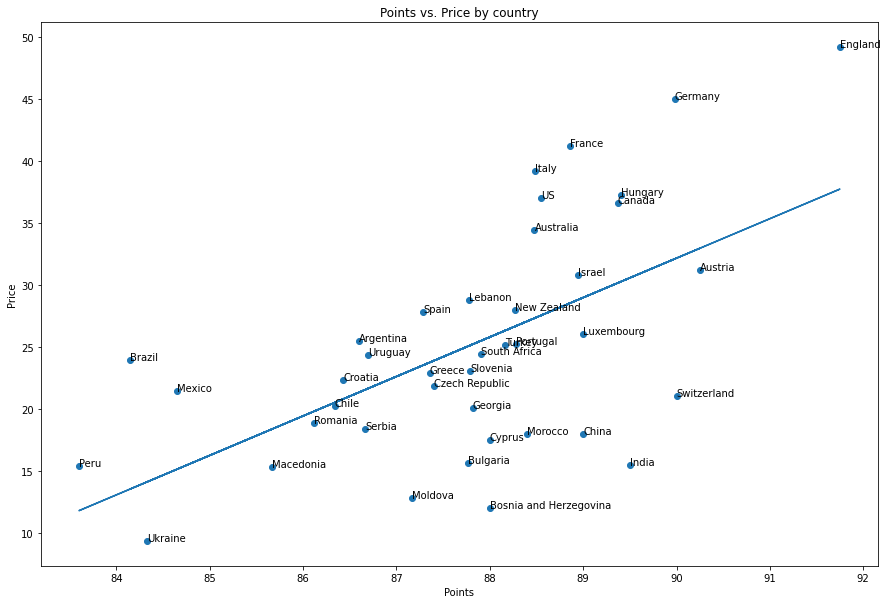

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df["points"], df["price"])
m, b = np.polyfit(df["points"].values, df["price"].values, 1)
n = df.index
ax.plot(df["points"], df["points"]*m+b)

for i, txt in enumerate(n):
    ax.annotate(txt, (df["points"].values[i], df["price"].values[i]))

ax.set_title("Points vs. Price by country")
ax.set_ylabel("Price");
ax.set_xlabel("Points");

In the above plot, the line represents the best fit linear relationship between points and price. This can provide us valuable information. For example, the fact that Austria is below the line tells us that Austria has a good rating for its price. On the other hand, Brazil has pretty expensive wine considering its low ratings.

If I was a wine guide, if someone came to me looking for an extremely cheap wine that was still good, I would recommend to them a country like Bosnia and Herzegovina or India.

## How to use the dashboard

1. Select a country from the drop-down menu
2. In the `search` menu, type a flavor that you are looking for. Ex: Earthy, goes well with meat, woody, deep, fruity, etc).
3. In the `variety` section, type a wine category such as, Pinot Grigio, Chardonnay, Red, etc.
4. Move the sliders to select your price range.
5. Move the sliders to select a points range. Points are based off ratings out of 100 from a wine reviwers.

Feel free to interact with the graph below to find the wine of your liking from any of the listed countries. When searching for a wine, also keep in mind some of the analysis shown above!

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

In [15]:
@ipywidgets.interact(country = countries, search="", variety="", min_price=(wine["price"].min(), wine["price"].max(), 10), max_price=(wine["price"].min(), wine["price"].max(), 10), min_points=(wine["points"].min(), wine["points"].max(), 10), max_points=(wine["points"].min(), wine["points"].max(), 10))
def test(country, search, variety, min_price, max_price, min_points, max_points):
    ax2 = world.plot( figsize=(15,10), edgecolor=u'gray', cmap='Pastel1' )
    # or plot Africa continent
    # ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')
    country_df = wine[wine["country"] == country]
    wine_names = wine[(wine["country"] == country)&(wine["description"].str.contains(search))&(wine["variety"].str.contains(variety))&(wine["price"].between(min_price, max_price))&(wine["points"].between(min_points, max_points))]
    display(wine_names[["points", "price", "title", "variety"]].dropna().set_index("title"))
    # then plot some countries on top
    plotCountryPatch(ax2, country, 'red')
    # the place to plot additional vector data (points, lines)
    
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')

    #ax2.axis('scaled')
    plt.show()

interactive(children=(Dropdown(description='country', options=('Italy', 'Portugal', 'US', 'Spain', 'France', '…